In [1]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy import stats

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
#mesmo modelo usando scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/home/dataanalysis/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#carregando arquivo
df_houses = pd.read_csv('/media/sf_FormacaoCientistaDeDados/Portfolio/House/kc_house_data.csv') 

In [3]:
#10 primeiras linhas
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Num de LInhas e colunas
df_houses.shape

(21613, 21)

In [5]:
#Informaçoes estatisticas
df_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
#tipo das colunas
df_houses.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#exclusao de coluna
df_houses.drop('id',axis=1,inplace=True)

In [7]:
#alterando tipo de dado
df_houses['date'] = pd.to_datetime(df_houses['date'])

In [8]:
#Renomeando colunas
colunas=['data','valor','quartos','banheiros','tam_casa','tam_terreno','qtd_andar','visao_mar','visita'
        ,'condicao','nota','tam_s_porao','tam_porao','ano_construcao','ano_reforma','cep','lat','long'
        ,'tam_sala_estar_2015','tam_terreno_2015']

In [9]:
#aplica nova nomenclatura
df_houses.columns = colunas

In [10]:
#valores nulos
df_houses.sum().isnull()

valor                  False
quartos                False
banheiros              False
tam_casa               False
tam_terreno            False
qtd_andar              False
visao_mar              False
visita                 False
condicao               False
nota                   False
tam_s_porao            False
tam_porao              False
ano_construcao         False
ano_reforma            False
cep                    False
lat                    False
long                   False
tam_sala_estar_2015    False
tam_terreno_2015       False
dtype: bool

In [17]:
#definindo novo tamanho de plot
plt.rcParams["figure.figsize"] = (18,12)

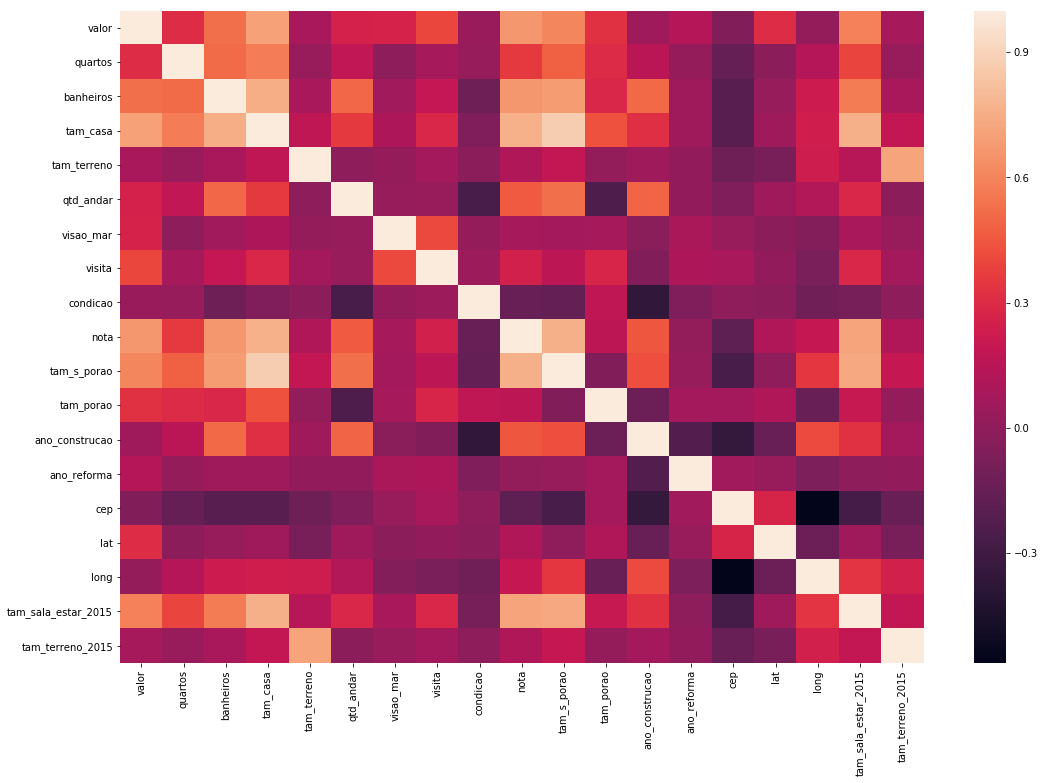

In [21]:
#Criando mapa de correlação
corr = df_houses.corr()

sns.heatmap(corr)

In [22]:
df_houses.drop('data',axis=1,inplace=True)

In [55]:
corr

,valor,quartos,banheiros,tam_casa,tam_terreno,qtd_andar,visao_mar,visita,condicao,nota,tam_s_porao,tam_porao,ano_construcao,ano_reforma,cep,lat,long,tam_sala_estar_2015,tam_terreno_2015
valor,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
quartos,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
banheiros,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
tam_casa,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
tam_terreno,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
qtd_andar,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
visao_mar,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
visita,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condicao,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
nota,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [30]:
# Verificando outliers com z-score
z_score = np.abs(stats.zscore(df_houses))
np.where(z_score > 3)

(array([    1,     5,     5, ..., 21590, 21590, 21600]),
 array([13,  2,  3, ..., 11, 17, 10]))

In [35]:
#removendo outliers
df_houses = df_houses[(z_score<3).all(axis=1)]

In [36]:
#verificando numero de linhas e colunas
df_houses.shape

(18702, 19)

In [ ]:
# Criando novas colunas
tam_casa, tam_s_porao


In [73]:
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_house.loc[:,df_house.columns !='valor'],df_house.loc[:,'valor'])


In [65]:
#criando modelo
modelo = LinearRegression()
modelo_v1 = modelo.fit(X_train,y_train)
modelo_v1.score(X_train,y_train)


0.67744269724745898

In [45]:
modelo_v1.score(X_test,y_test)
y_prev = modelo_v1.predict(X_test)


0.67914188146726673

In [48]:
modelo_v1.intercept_

-2698061.7169872187

In [66]:
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  valor   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1962.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:50:17   Log-Likelihood:            -1.8512e+05
No. Observations:               14026   AIC:                         3.703e+05
Df Residuals:                   14010   BIC:                         3.704e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.456e+06    2.4e+06     -1.022      0.307   -7.16e+06    2.25e+06
quartos             -1.418e+04   1702.007     -8.331      0.000   -1.75e+04   -1.08e+04
banheiros            2.773e+04   2838.149      9.771      0.000    2.22e+04    3.33e+04
tam_casa               66.4942      2.161     30.764      0.000      62.258      70.731
tam_terreno             0.3652      0.167      2.191      0.028       0.038       0.692
qtd_andar            3.058e+04   3012.874     10.149      0.000    2.47e+04    3.65e+04
visao_mar            6.204e-07   6.07e-07      1.021      0.307    -5.7e-07    1.81e-06
visita               3.628e+04   2843.902     12.757      0.000    3.07e+04    4.19e+04
condicao             2.937e+04   1926.950     15.240      0.000    2.56e+04    3.31e+04
nota                 8.371e+04   1849.802     45.256      0.000    8.01e+04    8.73e+04
tam_s_porao            37.2274      2.071     17.979      0.000      33.169      41.286
tam_porao              29.2653      2.413     12.126      0.000      24.535      33.996
ano_construcao      -2197.9640     60.822    -36.138      0.000   -2317.183   -2078.745
ano_reforma          5.674e-09    5.4e-09      1.050      0.294   -4.92e-09    1.63e-08
cep                  -316.2076     26.850    -11.777      0.000    -368.837    -263.578
lat                  5.684e+05   8540.151     66.555      0.000    5.52e+05    5.85e+05
long                 -8.34e+04    1.2e+04     -6.957      0.000   -1.07e+05   -5.99e+04
tam_sala_estar_2015    39.5176      3.192     12.381      0.000      33.261      45.774
tam_terreno_2015       -1.4112      0.218     -6.467      0.000      -1.839      -0.984
==============================================================================
Omnibus:                     3916.432   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18761.449
Skew:                           1.277   Prob(JB):                         0.00
Kurtosis:                       8.058   Cond. No.                     4.34e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.3e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
X_train.shape

(14026, 18)

In [75]:
#multicolinearidade
vif = pd.DataFrame()
vif["fator_vif"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["colunas"] = X_train.columns


/home/dataanalysis/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/dataanalysis/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [76]:
vif

,fator_vif,colunas
0,2.822099e+01,quartos
1,3.080396e+01,banheiros
2,inf,tam_casa
3,5.247014e+00,tam_terreno
4,1.815482e+01,qtd_andar
5,NaN,visao_mar
6,1.122996e+00,visita
7,3.585535e+01,condicao
8,1.582289e+02,nota
9,inf,tam_s_porao
